In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import lmdiag

In [5]:
# Read data from CSV file
SLR = pd.read_csv("SLR.csv")

In [6]:
SLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Landing Weight (kg)  37 non-null     int64  
 1   Fuel Flow (kg/h)     37 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 724.0 bytes


In [7]:
SLR.head()

,Landing Weight (kg),Fuel Flow (kg/h)
0,146167,4700.0
1,148500,4800.0
2,150333,4700.0
3,159000,5100.0
4,159333,5325.0


In [8]:
# Extract columns
x = SLR['Landing Weight (kg)']
y = SLR['Fuel Flow (kg/h)']

# Compute Covariance
covariance_matrix = np.cov(x, y)
covariance_xy = covariance_matrix[0, 1]

# Compute Pearson Correlation Coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Print Results
print("Covariance matrix:")
print(covariance_matrix)
print("Covariance between Landing Weight and Fuel Flow:", covariance_xy)
print("Pearson correlation coefficient:", correlation_coefficient)

Covariance matrix:
[[42340272.47447447  1514235.18205706]
 [ 1514235.18205706    71022.64451952]]
Covariance between Landing Weight and Fuel Flow: 1514235.1820570568
Pearson correlation coefficient: 0.8732087694883429


In [9]:
# Include intercept in the equation
x = sm.add_constant(x)

x.head()

,const,Landing Weight (kg)
0,1.0,146167
1,1.0,148500
2,1.0,150333
3,1.0,159000
4,1.0,159333


In [13]:
# Specify the model
model = sm.OLS(y, x)

# Fit the regression model
fit = model.fit()

# Print the model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Fuel Flow (kg/h)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.80e-12
Time:                        21:30:50   Log-Likelihood:                -232.06
No. Observations:                  37   AIC:                             468.1
Df Residuals:                      35   BIC:                             471.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -584.3075    

In [17]:
# Print Standard Error of the Estimate (Residual Standard Error)

fit.scale**.5

131.72049293118275

<module 'matplotlib.pyplot' from 'C:\\Users\\pappu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

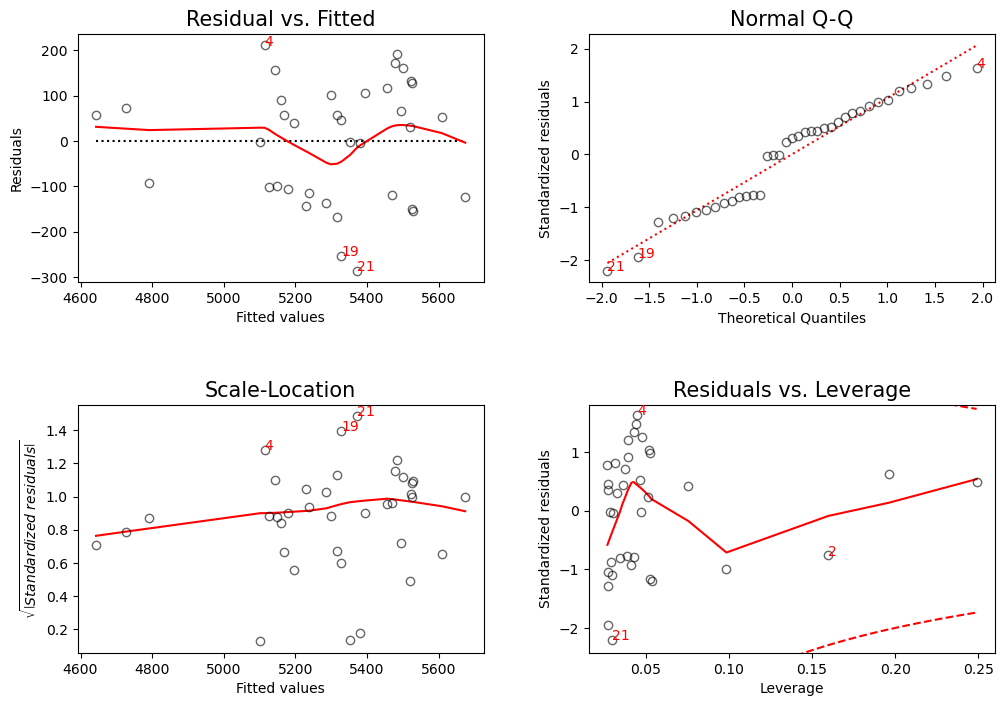

In [12]:
# Plot chart matrix (and enlarge figure)
plt.figure(figsize=(10,7))
lmdiag.plot(fit)

In [13]:
lmdiag.info()

        Name: Residuals vs. Fitted
      Method: lmdiag.resid_fit(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q
      Method: lmdiag.q_q(lm)
      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)
      y-Axis: Standardized residuals (Quantiles of 